# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1449.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.58e-45
Time:                        10:01:02   Log-Likelihood:                 12.730
No. Observations:                  50   AIC:                            -17.46
Df Residuals:                      46   BIC:                            -9.812
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0299      0.067     75.459      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.5019646   4.95704295  5.37779172  5.74140216  6.03329707  6.24952582
  6.39741338  6.49435691  6.5649674   6.63702618  6.73692053  6.8853083
  7.09372391  7.36268328  7.68159904  8.03052002  8.38340917  8.71242137
  8.99247832  9.2053888   9.34283749  9.40775108  9.4138175   9.38323697
  9.34307461  9.32081368  9.33984021  9.41560067  9.55306423  9.74590628
  9.97754761 10.22387826 10.45721874 10.65086774 10.78348901 10.84261687
 10.82670433 10.74537716 10.61785252 10.46978153 10.32903494 10.221124
 10.16500904 10.16998436 10.2341512  10.34472968 10.48015851 10.61363746
 10.71753055 10.76790655]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.73364177 10.58667511 10.34341917 10.04127623  9.72948083  9.45704545
  9.26076057  9.15618703  9.13384623  9.16154081]


## Plot comparison

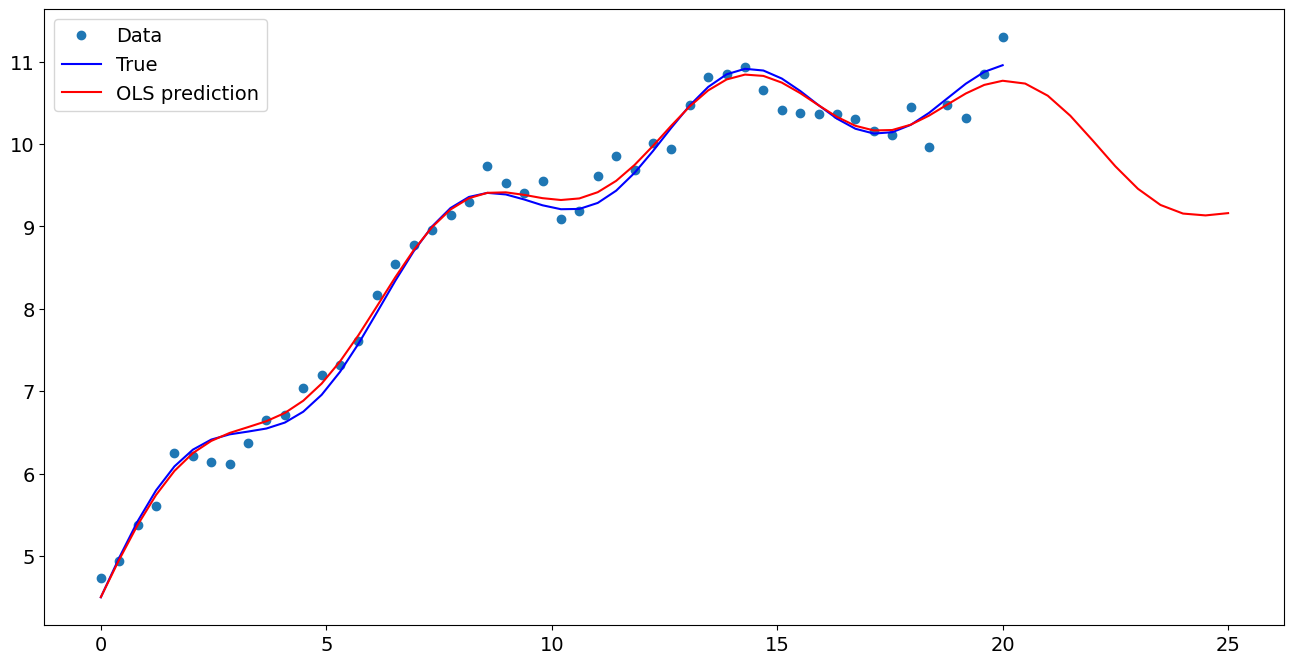

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.029936
x1                  0.505382
np.sin(x1)          0.418516
I((x1 - 5) ** 2)   -0.021119
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.733642
1    10.586675
2    10.343419
3    10.041276
4     9.729481
5     9.457045
6     9.260761
7     9.156187
8     9.133846
9     9.161541
dtype: float64